# Advanced Data Cleaning III

It is time to look at sales data to help the company identify opportunities to launch a new video game. <br>

Initially we will use the game sales data which we acquired from a public repository and later we will combine it with our previous analysis to answer the following questions:

1. How do video game sales (Total_Shipped) change over time?<br>
2. Which are the top 5 video game platforms in terms of sales (Total_Shipped)? Are the three platforms we study among them?<br>
3. Which are the top 10 selling games for each of the platforms of interest? (in the case that there were no serial numbers to use for merging the two dataframes, what would you do to make the best possible merge?)<br>
4. Are critic scores and user scores (ratings) different for these platforms?<br>
5. Bonus: Which genres have the highest sales for all these platforms?<br>
6. Super bonus: Which pair of genres is the most popular?<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from datetime import datetime

## Data reading
Lets start explore our data!

In [5]:
df_steam = pd.read_csv('Datasets/video_games_sales_2019.csv')
df_steam.head()

,Rank,Name,Genre,ESRB_Rating,Publisher,Developer,VGChartz_Score,Critic_Score,Total_Shipped,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,status,Vgchartzscore,img_url,serial,Platform,url
0,4.0,PlayerUnknown's Battlegrounds,Shooter,NaN,PUBG Corporation,PUBG Corporation,NaN,NaN,36.6,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,1.0,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg,3458498030,PC,http://www.vgchartz.com/game/215988/playerunkn...
1,906.0,PlayerUnknown's Battlegrounds,Shooter,T,Microsoft Studios,PUBG Corporation,NaN,NaN,NaN,1.29,0.69,NaN,0.20,2017.0,16th Jan 18,1.0,NaN,/games/boxart/full_8126502AmericaFrontccc.jpg,4837463162,XOne,http://www.vgchartz.com/game/215989/playerunkn...
2,6315.0,PlayerUnknown's Battlegrounds,Shooter,T,Sony Interactive Entertainment,PUBG Corporation,NaN,NaN,NaN,0.13,0.15,NaN,0.05,2018.0,18th Nov 18,1.0,NaN,/games/boxart/full_2004622AmericaFrontccc.jpg,4275517364,PS4,http://www.vgchartz.com/game/223059/playerunkn...
3,20.0,Grand Theft Auto V,Action,M,Rockstar Games,Rockstar North,NaN,9.4,NaN,6.37,9.85,0.99,3.12,2013.0,NaN,1.0,NaN,/games/boxart/full_6510540AmericaFrontccc.jpg,7612000280,PS3,http://www.vgchartz.com/game/65884/grand-theft...
4,21.0,Grand Theft Auto V,Action,M,Rockstar Games,Rockstar North,NaN,9.7,NaN,6.06,9.71,0.60,3.02,2014.0,03rd Jan 18,1.0,NaN,/games/boxart/full_5563178AmericaFrontccc.jpg,7107100479,PS4,http://www.vgchartz.com/game/83196/grand-theft...


In [6]:
df_steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10513 entries, 0 to 10512
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            10513 non-null  float64
 1   Name            10513 non-null  object 
 2   Genre           10513 non-null  object 
 3   ESRB_Rating     3330 non-null   object 
 4   Publisher       10513 non-null  object 
 5   Developer       10512 non-null  object 
 6   VGChartz_Score  0 non-null      float64
 7   Critic_Score    609 non-null    float64
 8   Total_Shipped   695 non-null    float64
 9   NA_Sales        2276 non-null   float64
 10  PAL_Sales       2131 non-null   float64
 11  JP_Sales        1977 non-null   float64
 12  Other_Sales     2789 non-null   float64
 13  Year            10513 non-null  float64
 14  Last_Update     6133 non-null   object 
 15  status          10513 non-null  float64
 16  Vgchartzscore   141 non-null    float64
 17  img_url         10513 non-null 

In [7]:
df_steam.describe()

,Rank,VGChartz_Score,Critic_Score,Total_Shipped,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,status,Vgchartzscore,serial
count,10513.000000,0.0,609.000000,695.000000,2276.000000,2131.000000,1977.000000,2789.000000,10513.000000,10513.0,141.000000,1.051300e+04
mean,28411.218396,NaN,7.677997,1.149971,0.265404,0.249404,0.070015,0.061825,2015.220965,1.0,6.726241,5.473967e+09
std,17551.503706,NaN,1.254731,2.503103,0.581373,0.664424,0.137318,0.179397,1.689504,0.0,1.369079,2.593271e+09
min,4.000000,NaN,1.000000,0.070000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.0,3.000000,1.000523e+09
25%,13723.000000,NaN,7.000000,0.170000,0.040000,0.020000,0.010000,0.000000,2014.000000,1.0,6.000000,3.219139e+09
50%,26555.000000,NaN,8.000000,0.310000,0.090000,0.070000,0.030000,0.010000,2015.000000,1.0,7.000000,5.473244e+09
75%,45387.000000,NaN,8.500000,1.075000,0.230000,0.210000,0.080000,0.050000,2017.000000,1.0,8.000000,7.687526e+09
max,55780.000000,NaN,10.000000,36.600000,9.060000,9.850000,2.690000,3.120000,2018.000000,1.0,9.300000,9.999740e+09


# 1. How do video game sales (Total_Shipped) change over time?

<AxesSubplot:xlabel='Year'>

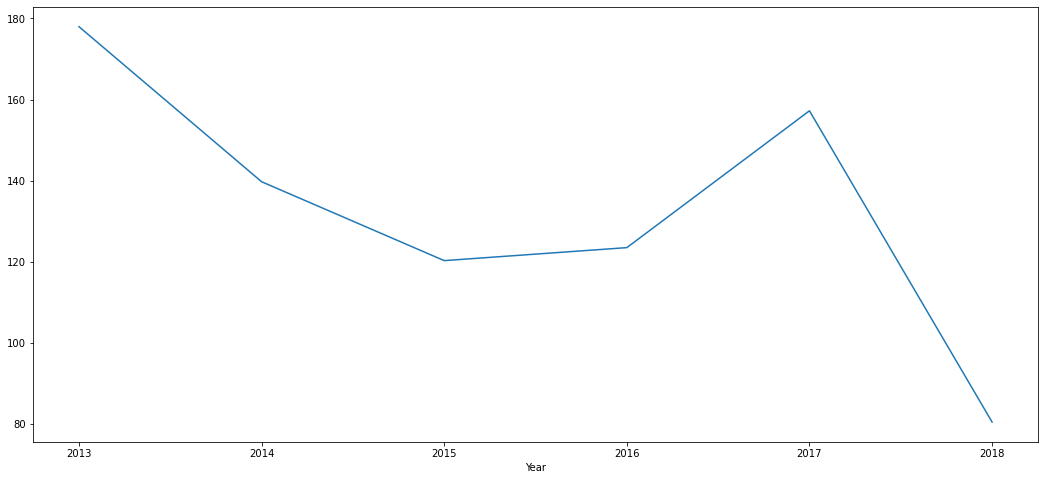

In [8]:
df_steam.groupby('Year')['Total_Shipped'].sum().plot(figsize=(18,8))

It seems that we don't have enough data after 2018. For our current analysis we will take the time range between 2013 and 2018

In [12]:
df_steam = df_steam[(df_steam['Year'] >= 2013) & (df_steam['Year'] < 2018)]
df_steam.tail()

,Rank,Name,Genre,ESRB_Rating,Publisher,Developer,VGChartz_Score,Critic_Score,Total_Shipped,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,status,Vgchartzscore,img_url,serial,Platform,url
10505,55753.0,Yesterday Origins,Adventure,NaN,Microids,Pendulo Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0,05th Jan 18,1.0,NaN,/games/boxart/default.jpg,4704814528,PC,http://www.vgchartz.com/game/220361/yesterday-...
10506,55757.0,Yodanji,Role-Playing,NaN,Kemco,Kemco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,26th Mar 18,1.0,NaN,/games/boxart/full_7187999AmericaFrontccc.png,8727468309,NS,http://www.vgchartz.com/game/221220/yodanji/?r...
10507,55759.0,Yono and the Celestial Elephants,Adventure,NaN,Plug In Digital,Neckbolt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,26th Mar 18,1.0,NaN,/games/boxart/full_9666065AmericaFrontccc.png,6338454344,NS,http://www.vgchartz.com/game/221637/yono-and-t...
10509,55776.0,ZOMBIE GOLD RUSH,Action,NaN,Amazing Inc.,Amazing Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,26th Mar 18,1.0,NaN,/games/boxart/full_286902AmericaFrontccc.png,7368688060,NS,http://www.vgchartz.com/game/221640/zombie-gol...
10511,55779.0,Zoo Tycoon: Ultimate Animal Collection,Simulation,E,Microsoft Studios,Frontier Developments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,26th Sep 18,1.0,NaN,/games/boxart/full_3978419AmericaFrontccc.jpg,7399794145,XOne,http://www.vgchartz.com/game/220265/zoo-tycoon...


<AxesSubplot:xlabel='Year'>

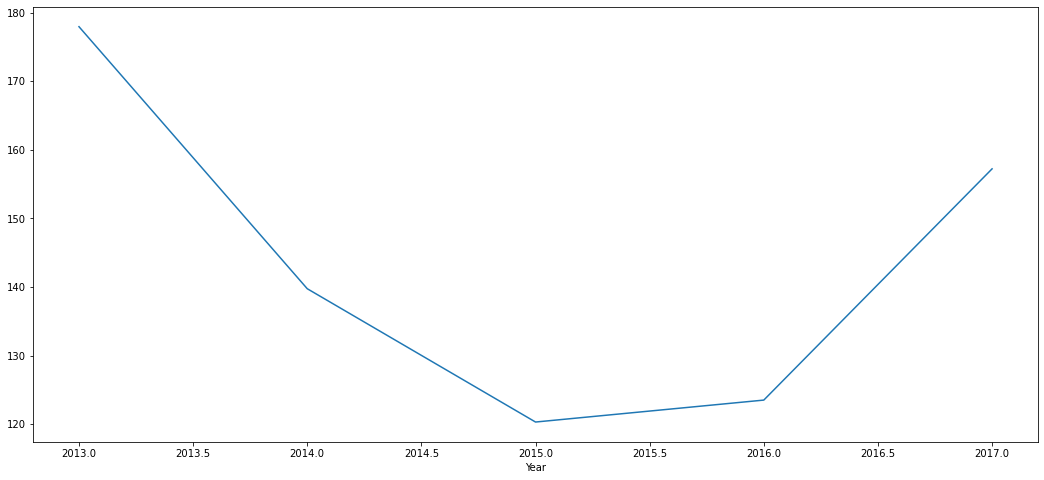

In [13]:
df_steam.groupby('Year')['Total_Shipped'].sum().plot(figsize=(18,8))

# 2.Which are the top 5 video game platforms in terms of sales? Are the three platforms we study among them?

In [14]:
df_steam.groupby('Platform').sum().sort_values('Total_Shipped', ascending = False).head(10)

,Rank,VGChartz_Score,Critic_Score,Total_Shipped,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,status,Vgchartzscore,serial
Platform,,,,,,,,,,,,
PC,62891241.0,0.0,435.8,351.73,10.35,22.72,0.00,2.52,4339693.0,2154.0,82.5,11716882853190
3DS,15448994.0,0.0,852.6,166.10,15.16,13.57,37.56,2.62,1416068.0,703.0,14.0,3940017334730
NS,14950916.0,0.0,363.9,57.38,9.03,7.55,2.07,1.55,703933.0,349.0,0.0,1877863978012
WiiU,9026415.0,0.0,433.3,51.05,14.01,10.77,4.03,2.36,680836.0,338.0,0.0,1864945780803
PS4,24622039.0,0.0,633.3,48.41,170.19,215.71,24.45,75.51,2205271.0,1094.0,37.8,6013920619037
XOne,15253169.0,0.0,356.8,16.87,145.54,71.95,0.38,21.88,1334403.0,662.0,16.2,3572035419374
PS3,12236413.0,0.0,270.2,13.81,64.38,72.90,24.90,27.04,1234639.0,613.0,0.0,3414221056030
X360,6595611.0,0.0,179.9,13.00,82.15,44.10,0.67,12.54,692812.0,344.0,16.3,1947029599856
PSV,17393781.0,0.0,28.5,0.23,6.16,7.31,23.69,4.13,1565683.0,777.0,31.6,4253279388055


PC, PS4 and Xone is in this least something we expect as the years range match the period for these platforms

# 3. Which are the top 10 selling games for each of the platforms of interest?

In [15]:
# lets see the top 10 selling games for pc
df_steam_pc = df_steam[df_steam['Platform'] == 'PC']
pc_top = df_steam_pc.sort_values('Total_Shipped', ascending = False).head(10)
pc_top

,Rank,Name,Genre,ESRB_Rating,Publisher,Developer,VGChartz_Score,Critic_Score,Total_Shipped,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,status,Vgchartzscore,img_url,serial,Platform,url
0,4.0,PlayerUnknown's Battlegrounds,Shooter,NaN,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,1.0,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg,3458498030,PC,http://www.vgchartz.com/game/215988/playerunkn...
6,61.0,Grand Theft Auto V,Action,M,Rockstar Games,Rockstar North,NaN,NaN,12.60,NaN,NaN,NaN,NaN,2015.0,02nd Nov 18,1.0,NaN,/games/boxart/full_9031276AmericaFrontccc.jpg,8635296110,PC,http://www.vgchartz.com/game/83197/grand-theft...
117,182.0,Euro Truck Simulator 2,Simulation,NaN,SCS Software,SCS Software,NaN,8.5,5.98,NaN,NaN,NaN,NaN,2013.0,31st Dec 17,1.0,NaN,/games/boxart/full_7497790PALFrontccc.jpg,3047851025,PC,http://www.vgchartz.com/game/71076/euro-truck-...
118,186.0,Age of Empires II: HD Edition,Strategy,NaN,Microsoft Studios,Hidden Path Entertainment,NaN,NaN,5.82,NaN,NaN,NaN,NaN,2013.0,02nd Oct 18,1.0,NaN,/games/boxart/full_7218098AmericaFrontccc.jpg,9135373904,PC,http://www.vgchartz.com/game/220226/age-of-emp...
126,209.0,Tomb Raider (2013),Action,M,Square Enix,Crystal Dynamics,NaN,8.8,5.50,NaN,NaN,NaN,NaN,2013.0,06th Jan 18,1.0,NaN,/games/boxart/full_5321723AmericaFrontccc.jpg,6871346502,PC,http://www.vgchartz.com/game/70430/tomb-raider...
129,210.0,The Witcher 3: Wild Hunt,Role-Playing,M,Warner Bros. Interactive Entertainment,CD Projekt Red Studio,NaN,NaN,5.48,NaN,NaN,NaN,NaN,2015.0,04th May 18,1.0,NaN,/games/boxart/full_5355846AmericaFrontccc.jpg,3633110156,PC,http://www.vgchartz.com/game/71483/the-witcher...
134,225.0,The Forest,Misc,NaN,Endnight Games Ltd,Unknown,NaN,NaN,5.30,NaN,NaN,NaN,NaN,2014.0,NaN,1.0,NaN,/games/boxart/full_7703243AmericaFrontccc.jpg,9057476644,PC,http://www.vgchartz.com/game/82736/the-forest/...
139,255.0,Cities: Skylines,Simulation,E,Paradox Interactive,Colossal Order,NaN,NaN,5.00,NaN,NaN,NaN,NaN,2015.0,14th Jan 18,1.0,NaN,/games/boxart/full_1184797AmericaFrontccc.jpg,7926583716,PC,http://www.vgchartz.com/game/84637/cities-skyl...
147,267.0,Stardew Valley,Simulation,E10,Chucklefish,ConcernedApe,NaN,9.2,4.91,NaN,NaN,NaN,NaN,2016.0,21st Mar 18,1.0,NaN,/games/boxart/full_5698458AmericaFrontccc.jpg,5246898937,PC,http://www.vgchartz.com/game/155895/stardew-va...
159,294.0,BioShock Infinite,Shooter,M,2K Games,Irrational Games,NaN,NaN,4.56,NaN,NaN,NaN,NaN,2013.0,NaN,1.0,NaN,/games/boxart/full_7665085AmericaFrontccc.jpg,4110154752,PC,http://www.vgchartz.com/game/46735/bioshock-in...


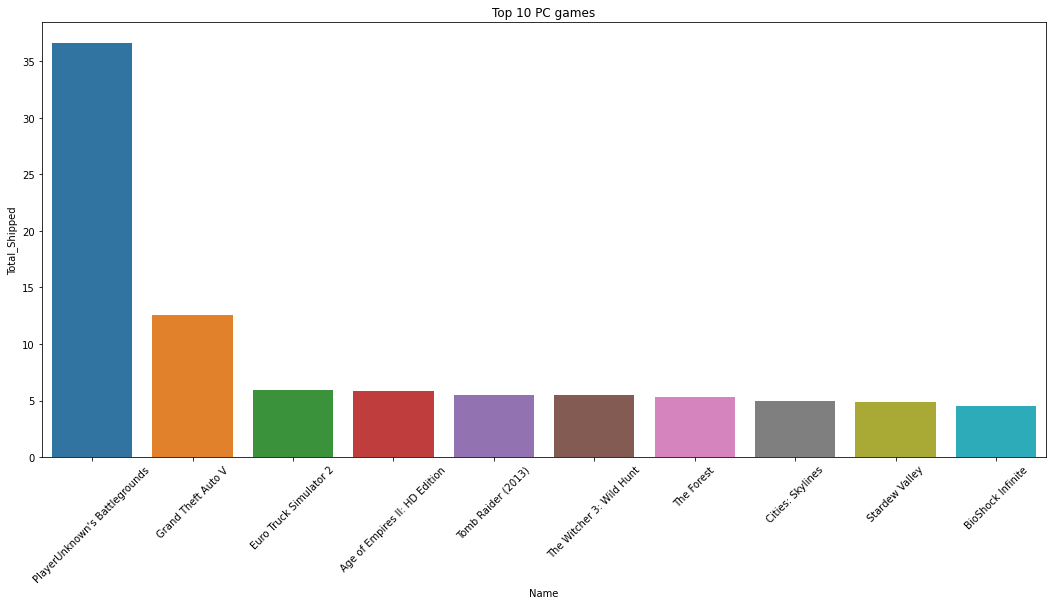

In [16]:
plt.figure(figsize=(18,8))
sns.barplot(x="Name", y="Total_Shipped", data=pc_top).set_title('Top 10 PC games')
plt.xticks(rotation=45)

plt.show()

In [17]:
df_steam_ps4 = df_steam[df_steam['Platform'] == 'PS4']
ps4_top = df_steam_ps4.sort_values('Total_Shipped', ascending = False).head(10)
ps4_top

,Rank,Name,Genre,ESRB_Rating,Publisher,Developer,VGChartz_Score,Critic_Score,Total_Shipped,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,status,Vgchartzscore,img_url,serial,Platform,url
52,85.0,Horizon: Zero Dawn,Action,T,Sony Interactive Entertainment,Guerrilla Games,NaN,9.1,10.00,NaN,NaN,NaN,NaN,2017.0,15th Jan 18,1.0,NaN,/games/boxart/full_719511AmericaFrontccc.jpg,5702630339,PS4,http://www.vgchartz.com/game/85674/horizon-zer...
68,109.0,Uncharted 4: A Thief's End,Action,T,Sony Interactive Entertainment,Naughty Dog,NaN,9.2,8.70,NaN,NaN,NaN,NaN,2016.0,23rd Sep 18,1.0,NaN,/games/boxart/full_2804791AmericaFrontccc.jpg,8284701633,PS4,http://www.vgchartz.com/game/77189/uncharted-4...
243,399.0,Resident Evil VII: Biohazard,Action,M,Capcom,Capcom,NaN,8.6,3.83,NaN,NaN,NaN,NaN,2017.0,06th Nov 18,1.0,NaN,/games/boxart/full_6517784AmericaFrontccc.png,8617170035,PS4,http://www.vgchartz.com/game/120127/resident-e...
479,939.0,Killzone: Shadow Fall,Shooter,M,Sony Computer Entertainment,Guerrilla Games,NaN,9.0,2.10,NaN,NaN,NaN,NaN,2013.0,14th Apr 18,1.0,NaN,/games/boxart/full_664576AmericaFrontccc.jpg,6312375246,PS4,http://www.vgchartz.com/game/71543/killzone-sh...
297,946.0,Dark Souls III,Role-Playing,M,Namco Bandai Games,From Software,NaN,NaN,2.09,NaN,NaN,NaN,NaN,2016.0,23rd Apr 18,1.0,NaN,/games/boxart/full_6276285AmericaFrontccc.jpg,2330143804,PS4,http://www.vgchartz.com/game/85669/dark-souls-...
506,1005.0,Dragon Ball: Xenoverse,Fighting,T,Namco Bandai Games,Dimps Corporation,NaN,NaN,2.01,NaN,NaN,NaN,NaN,2015.0,11th Sep 18,1.0,NaN,/games/boxart/full_2446198AmericaFrontccc.jpg,9449300465,PS4,http://www.vgchartz.com/game/82944/dragon-ball...
512,1009.0,Bloodborne,Role-Playing,M,Sony Computer Entertainment,From Software,NaN,8.2,2.00,NaN,NaN,NaN,NaN,2015.0,10th Apr 18,1.0,NaN,/games/boxart/full_157272AmericaFrontccc.png,9246878296,PS4,http://www.vgchartz.com/game/82937/bloodborne/...
514,1015.0,Driveclub,Racing,E,Sony Computer Entertainment,Evolution Studios,NaN,7.2,2.00,NaN,NaN,NaN,NaN,2014.0,25th Sep 18,1.0,5.8,/games/boxart/full_8788232AmericaFrontccc.jpg,1782944324,PS4,http://www.vgchartz.com/game/71542/driveclub/?...
526,1082.0,Dragon Ball: Xenoverse 2,Action,T,Namco Bandai Games,Dimps Corporation,NaN,7.1,1.90,NaN,NaN,NaN,NaN,2016.0,03rd Mar 18,1.0,NaN,/games/boxart/full_1341854AmericaFrontccc.jpg,9369594561,PS4,http://www.vgchartz.com/game/122286/dragon-bal...
575,1207.0,Naruto Shippuden: Ultimate Ninja Storm 4,Fighting,T,Namco Bandai Games,CyberConnect2,NaN,NaN,1.74,NaN,NaN,NaN,NaN,2016.0,22nd Sep 18,1.0,NaN,/games/boxart/full_3361687AmericaFrontccc.png,7569440528,PS4,http://www.vgchartz.com/game/84977/naruto-ship...


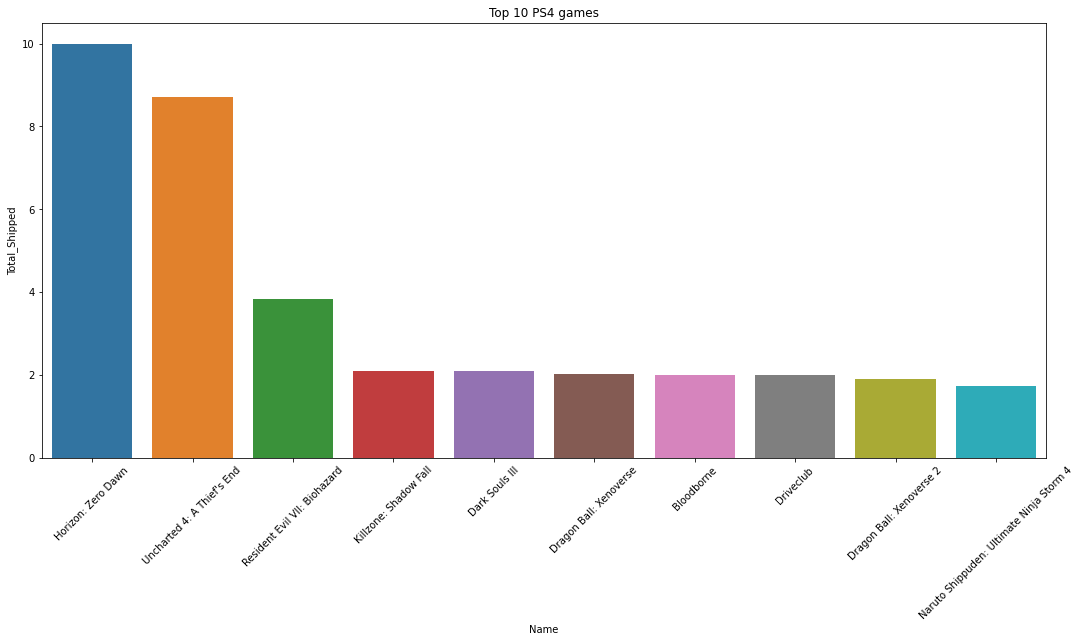

In [18]:
plt.figure(figsize=(18,8))
sns.barplot(x="Name", y="Total_Shipped", data=ps4_top).set_title('Top 10 PS4 games')
plt.xticks(rotation=45)

plt.show()

In [19]:
df_steam_xbox = df_steam[df_steam['Platform'] == 'XOne']
xbox_top = df_steam_xbox.sort_values('Total_Shipped', ascending = False).head(10)
xbox_top

,Rank,Name,Genre,ESRB_Rating,Publisher,Developer,VGChartz_Score,Critic_Score,Total_Shipped,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,status,Vgchartzscore,img_url,serial,Platform,url
145,259.0,Halo 5: Guardians,Shooter,T,Microsoft Studios,343 Industries,NaN,8.6,5.00,NaN,NaN,NaN,NaN,2015.0,24th Mar 18,1.0,NaN,/games/boxart/full_5219144AmericaFrontccc.jpg,9977785509,XOne,http://www.vgchartz.com/game/82148/halo-5-guar...
372,696.0,Dead Rising 3,Action,M,Microsoft Studios,Capcom,NaN,NaN,2.60,NaN,NaN,NaN,NaN,2013.0,24th Mar 18,1.0,7.9,/games/boxart/full_626152AmericaFrontccc.jpg,5685136406,XOne,http://www.vgchartz.com/game/73076/dead-rising...
383,736.0,Forza Horizon 3,Racing,E,Microsoft Studios,Playground Games,NaN,9.0,2.50,NaN,NaN,NaN,NaN,2016.0,13th Jan 18,1.0,NaN,/games/boxart/full_8430955AmericaFrontccc.jpg,6988396954,XOne,http://www.vgchartz.com/game/119955/forza-hori...
170,1475.0,ARK: Survival Evolved,Action-Adventure,T,Studio Wildcard,Studio Wildcard,NaN,NaN,1.50,NaN,NaN,NaN,NaN,2017.0,22nd Sep 18,1.0,NaN,/games/boxart/full_962987AmericaFrontccc.png,8548565768,XOne,http://www.vgchartz.com/game/182657/ark-surviv...
244,2324.0,Resident Evil VII: Biohazard,Action,M,Capcom,Capcom,NaN,7.9,1.04,NaN,NaN,NaN,NaN,2017.0,15th Jan 18,1.0,NaN,/games/boxart/full_5960719AmericaFrontccc.jpg,2921319694,XOne,http://www.vgchartz.com/game/120128/resident-e...
298,2374.0,Dark Souls III,Role-Playing,M,Namco Bandai Games,From Software,NaN,NaN,1.01,NaN,NaN,NaN,NaN,2016.0,11th Nov 18,1.0,NaN,/games/boxart/full_3767599AmericaFrontccc.jpg,6544694726,XOne,http://www.vgchartz.com/game/85668/dark-souls-...
387,2420.0,Rise of the Tomb Raider,Adventure,T,Square Enix,Crystal Dynamics,NaN,NaN,1.00,NaN,NaN,NaN,NaN,2015.0,11th Apr 18,1.0,NaN,/games/boxart/full_2029589AmericaFrontccc.png,6036492049,XOne,http://www.vgchartz.com/game/82908/rise-of-the...
990,2407.0,Forza Motorsport 6,Racing,E,Microsoft Studios,Turn 10 Studios,NaN,NaN,1.00,NaN,NaN,NaN,NaN,2015.0,12th Jan 18,1.0,NaN,/games/boxart/full_5338456AmericaFrontccc.jpg,5609414077,XOne,http://www.vgchartz.com/game/85161/forza-motor...
1114,2788.0,Dead Rising 4,Action-Adventure,M,Microsoft Studios,Capcom,NaN,NaN,0.87,NaN,NaN,NaN,NaN,2016.0,25th Sep 18,1.0,NaN,/games/boxart/full_7990936AmericaFrontccc.png,1621224739,XOne,http://www.vgchartz.com/game/119327/dead-risin...
1497,7382.0,Mega Man Legacy Collection,Platform,E,Capcom,Digital Eclipse Software,NaN,NaN,0.27,NaN,NaN,NaN,NaN,2015.0,29th May 18,1.0,NaN,/games/boxart/full_7618466AmericaFrontccc.jpg,8190487714,XOne,http://www.vgchartz.com/game/85881/mega-man-le...


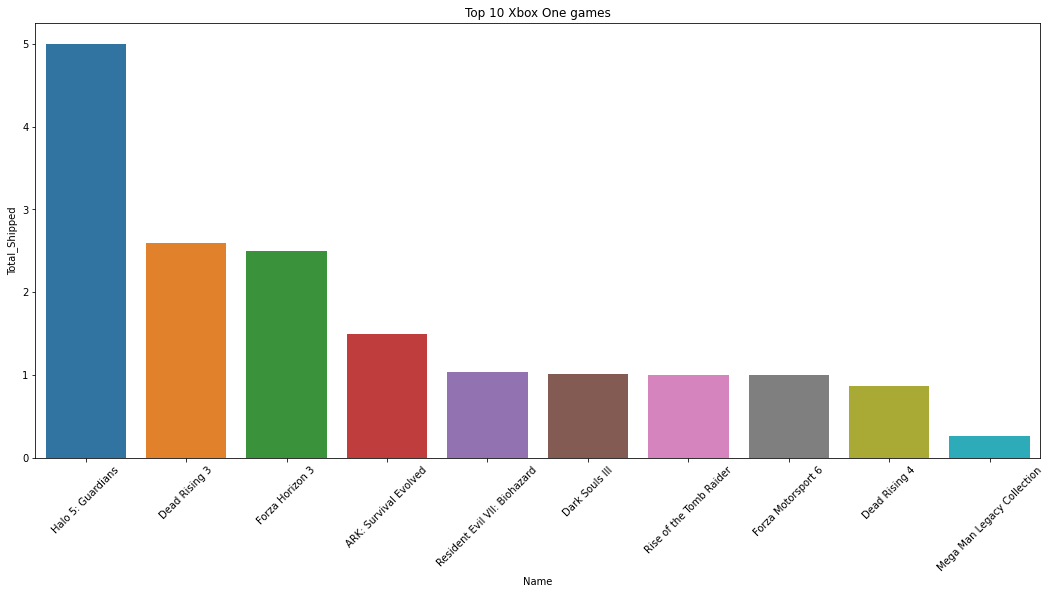

In [20]:
plt.figure(figsize=(18,8))
sns.barplot(x="Name", y="Total_Shipped", data=xbox_top).set_title('Top 10 Xbox One games')
plt.xticks(rotation=45)

plt.show()

# 4. Are critic scores and user scores (ratings) different for these platforms?

In order to compare the critic scores we have to merge the two datasets but what column we should use?<br>
I belive the best option is to go with column name if we cant use the column serial or if we didnt have it. <br>
However we need to prepare this column before this, for example we should lowercase the characters!

In [23]:
# first we have to load the second dataset
df = pd.read_csv('Datasets/igbd_dataset_v2.csv')
df.head()

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score,PlayStation 4,Xbox One,PC,Point-and-click,Fighting,Shooter,Music,Puzzle,Racing,Real Time Strategy (RTS),Role-playing (RPG),Simulator,Sport,Strategy,Turn-based strategy (TBS),Tactical,Quiz/Trivia,Hack and slash/Beat 'em up,Pinball,Adventure,Arcade,Visual Novel,Indie,Card & Board Game,MOBA,serial,Platform,url
0,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",75.577492,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.0625,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3458498030,0.0,https://www.igdb.com/games/playerunknowns-batt...
1,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",75.577492,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.0625,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4837463162,0.0,https://www.igdb.com/games/playerunknowns-batt...
2,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",75.577492,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.0625,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4275517364,0.0,https://www.igdb.com/games/playerunknowns-batt...
3,1020.0,GrandTheftAutoV,"['PC', 'PlayStation 3', 'Xbox 360', 'PlayStati...",2013-09-17,Main Game,"['Shooter', 'Racing', 'Sport', 'Adventure']","1,27,33,38","['First person', 'Third person']",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,95.8400,34.0,2013.0,9.0,253272.490450,100.000000,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7612000280,0.0,https://www.igdb.com/games/grand-theft-auto-v
4,1020.0,GrandTheftAutoV,"['PC', 'PlayStation 3', 'Xbox 360', 'PlayStati...",2013-09-17,Main Game,"['Shooter', 'Racing', 'Sport', 'Adventure']","1,27,33,38","['First person', 'Third person']",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,95.8400,34.0,2013.0,9.0,253272.490450,100.000000,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7107100479,0.0,https://www.igdb.com/games/grand-theft-auto-v


In [24]:
# We lowercase the strings
df['name_lower'] = df['name'].str.lower()

In [25]:
# We lowercase the strings
df_steam['name_lower'] = df_steam['Name'].str.lower()
# we use regex to uniform the data
df_steam['name_lower'].replace(to_replace='\s',value='', inplace=True, regex=True)

In [27]:
# now we can merge
sales_merge = df_steam.merge(df, how='left', left_on='name_lower', right_on='name_lower')
sales_merge

,Rank,Name,Genre,ESRB_Rating,Publisher,Developer,VGChartz_Score,Critic_Score,Total_Shipped,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,status,Vgchartzscore,img_url,serial_x,Platform_x,url_x,name_lower,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score,PlayStation 4,Xbox One,PC,Point-and-click,Fighting,Shooter,Music,Puzzle,Racing,Real Time Strategy (RTS),Role-playing (RPG),Simulator,Sport,Strategy,Turn-based strategy (TBS),Tactical,Quiz/Trivia,Hack and slash/Beat 'em up,Pinball,Adventure,Arcade,Visual Novel,Indie,Card & Board Game,MOBA,serial_y,Platform_y,url_y
0,4.0,PlayerUnknown's Battlegrounds,Shooter,NaN,PUBG Corporation,PUBG Corporation,NaN,NaN,36.6,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,1.0,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg,3458498030,PC,http://www.vgchartz.com/game/215988/playerunkn...,playerunknown'sbattlegrounds,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",75.577492,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.062500,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.458498e+09,0.0,https://www.igdb.com/games/playerunknowns-batt...
1,4.0,PlayerUnknown's Battlegrounds,Shooter,NaN,PUBG Corporation,PUBG Corporation,NaN,NaN,36.6,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,1.0,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg,3458498030,PC,http://www.vgchartz.com/game/215988/playerunkn...,playerunknown'sbattlegrounds,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",75.577492,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.062500,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.837463e+09,0.0,https://www.igdb.com/games/playerunknowns-batt...
2,4.0,PlayerUnknown's Battlegrounds,Shooter,NaN,PUBG Corporation,PUBG Corporation,NaN,NaN,36.6,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,1.0,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg,3458498030,PC,http://www.vgchartz.com/game/215988/playerunkn...,playerunknown'sbattlegrounds,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",75.577492,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.062500,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.275517e+09,0.0,https://www.igdb.com/games/playerunknowns-batt...
3,906.0,PlayerUnknown's Battlegrounds,Shooter,T,Microsoft Studios,PUBG Corporation,NaN,NaN,NaN,1.29,0.69,NaN,0.2,2017.0,16th Jan 18,1.0,NaN,/games/boxart/full_8126502AmericaFrontccc.jpg,4837463162,XOne,http://www.vgchartz.com/game/215989/playerunkn...,playerunknown'sbattlegrounds,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",75.577492,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.062500,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.458498e+09,0.0,https://www.igdb.com/games/playerunknowns-batt...
4,906.0,PlayerUnknown's Battlegrounds,Shooter,T,Microsoft Studios,PUBG Corporation,NaN,NaN,NaN,1.29,0.69,NaN,0.2,2017.0,16th Jan 18,1.0,NaN,/games/boxart/full_8126502AmericaFrontccc.jpg,4837463162,XOne,http://ww

In [28]:
sales_merge = sales_merge[sales_merge['name'].notna()]
sales_merge

,Rank,Name,Genre,ESRB_Rating,Publisher,Developer,VGChartz_Score,Critic_Score,Total_Shipped,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,status,Vgchartzscore,img_url,serial_x,Platform_x,url_x,name_lower,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score,PlayStation 4,Xbox One,PC,Point-and-click,Fighting,Shooter,Music,Puzzle,Racing,Real Time Strategy (RTS),Role-playing (RPG),Simulator,Sport,Strategy,Turn-based strategy (TBS),Tactical,Quiz/Trivia,Hack and slash/Beat 'em up,Pinball,Adventure,Arcade,Visual Novel,Indie,Card & Board Game,MOBA,serial_y,Platform_y,url_y
0,4.0,PlayerUnknown's Battlegrounds,Shooter,NaN,PUBG Corporation,PUBG Corporation,NaN,NaN,36.6,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,1.0,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg,3458498030,PC,http://www.vgchartz.com/game/215988/playerunkn...,playerunknown'sbattlegrounds,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",75.577492,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.062500,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.458498e+09,0.0,https://www.igdb.com/games/playerunknowns-batt...
1,4.0,PlayerUnknown's Battlegrounds,Shooter,NaN,PUBG Corporation,PUBG Corporation,NaN,NaN,36.6,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,1.0,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg,3458498030,PC,http://www.vgchartz.com/game/215988/playerunkn...,playerunknown'sbattlegrounds,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",75.577492,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.062500,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.837463e+09,0.0,https://www.igdb.com/games/playerunknowns-batt...
2,4.0,PlayerUnknown's Battlegrounds,Shooter,NaN,PUBG Corporation,PUBG Corporation,NaN,NaN,36.6,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,1.0,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg,3458498030,PC,http://www.vgchartz.com/game/215988/playerunkn...,playerunknown'sbattlegrounds,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",75.577492,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.062500,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.275517e+09,0.0,https://www.igdb.com/games/playerunknowns-batt...
3,906.0,PlayerUnknown's Battlegrounds,Shooter,T,Microsoft Studios,PUBG Corporation,NaN,NaN,NaN,1.29,0.69,NaN,0.2,2017.0,16th Jan 18,1.0,NaN,/games/boxart/full_8126502AmericaFrontccc.jpg,4837463162,XOne,http://www.vgchartz.com/game/215989/playerunkn...,playerunknown'sbattlegrounds,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",75.577492,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.062500,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.458498e+09,0.0,https://www.igdb.com/games/playerunknowns-batt...
4,906.0,PlayerUnknown's Battlegrounds,Shooter,T,Microsoft Studios,PUBG Corporation,NaN,NaN,NaN,1.29,0.69,NaN,0.2,2017.0,16th Jan 18,1.0,NaN,/games/boxart/full_8126502AmericaFrontccc.jpg,4837463162,XOne,http://ww

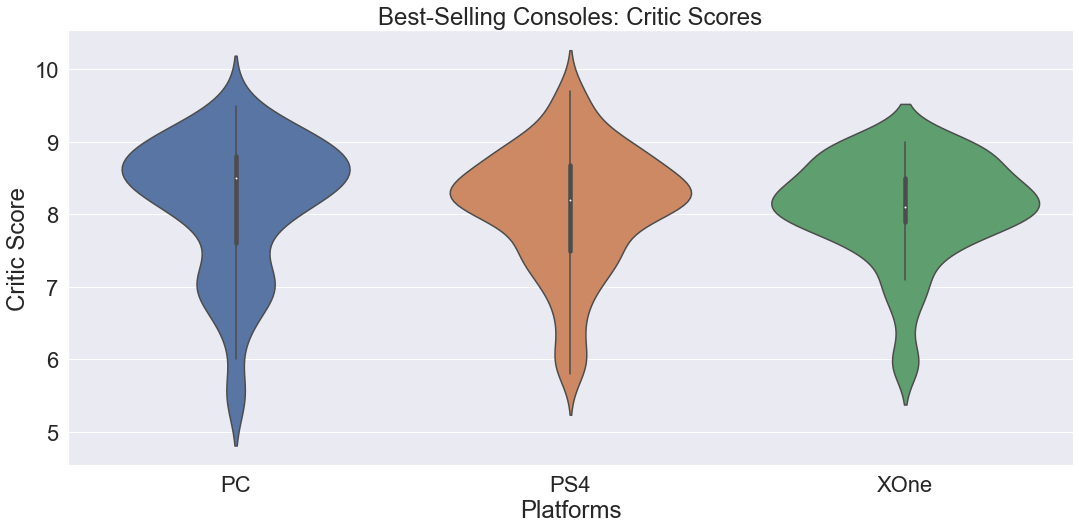

In [31]:
# lets plot column critic score to observe our data
plt.figure(figsize=(18,8))
sns.set(font_scale=2)
ax = sns.violinplot(x='Platform_x', y='Critic_Score', data=sales_merge, order=['PC','PS4', 'XOne'])
ax.set(xlabel='Platforms', ylabel='Critic Score', title='Best-Selling Consoles: Critic Scores')
plt.show()

C:\Users\stama\AppData\Local\Temp/ipykernel_21100/1951764871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_merge['rating'] = sales_merge['rating'] / 10


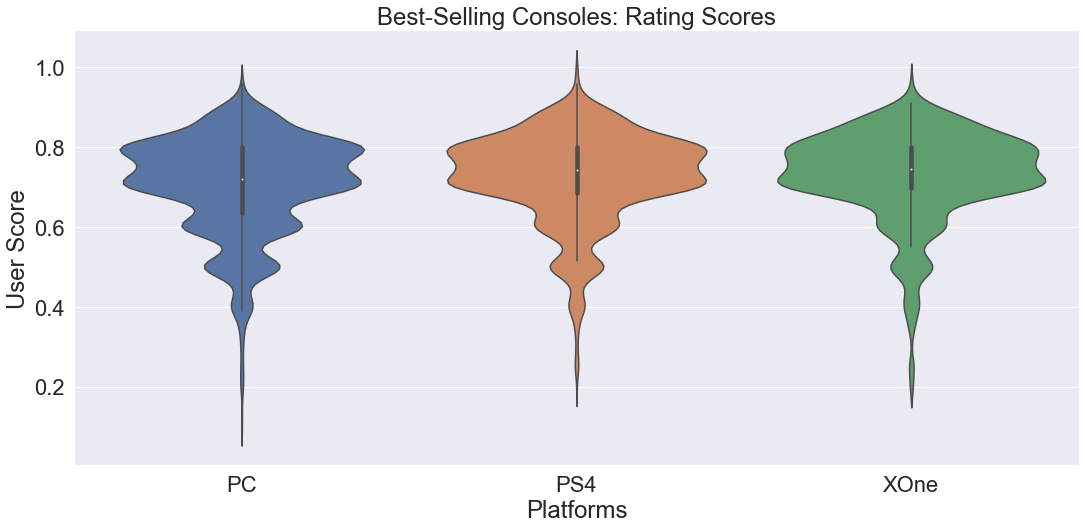

In [32]:
#Lets use now the column rating (players rating)
sales_merge['rating'] = sales_merge['rating'] / 10

plt.figure(figsize=(18,8))
sns.set(font_scale=2)
ax = sns.violinplot(x='Platform_x', y='rating', data=sales_merge, order=['PC','PS4', 'XOne'])
ax.set(xlabel='Platforms', ylabel='User Score', title='Best-Selling Consoles: Rating Scores')
plt.show()

As we can observe if we use the rating scores (players rating) the ratings between these 3 platforms are really close. <br>
If we use critic scores which is the score of critics we can observe some differences!

# 5.Bonus: Which genres have the highest sales for all these platforms?

In [34]:
# we need to create a new datasets which have the sales only for these 3 platforms
sales_merge_pl_int = sales_merge[(sales_merge['Platform_x'] == 'PC') | (sales_merge['Platform_x'] == 'PS4') | (sales_merge['Platform_x'] == 'XOne')]
sales_merge_pl_int

,Rank,Name,Genre,ESRB_Rating,Publisher,Developer,VGChartz_Score,Critic_Score,Total_Shipped,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,status,Vgchartzscore,img_url,serial_x,Platform_x,url_x,name_lower,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score,PlayStation 4,Xbox One,PC,Point-and-click,Fighting,Shooter,Music,Puzzle,Racing,Real Time Strategy (RTS),Role-playing (RPG),Simulator,Sport,Strategy,Turn-based strategy (TBS),Tactical,Quiz/Trivia,Hack and slash/Beat 'em up,Pinball,Adventure,Arcade,Visual Novel,Indie,Card & Board Game,MOBA,serial_y,Platform_y,url_y
0,4.0,PlayerUnknown's Battlegrounds,Shooter,NaN,PUBG Corporation,PUBG Corporation,NaN,NaN,36.6,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,1.0,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg,3458498030,PC,http://www.vgchartz.com/game/215988/playerunkn...,playerunknown'sbattlegrounds,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",0.755775,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.062500,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.458498e+09,0.0,https://www.igdb.com/games/playerunknowns-batt...
1,4.0,PlayerUnknown's Battlegrounds,Shooter,NaN,PUBG Corporation,PUBG Corporation,NaN,NaN,36.6,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,1.0,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg,3458498030,PC,http://www.vgchartz.com/game/215988/playerunkn...,playerunknown'sbattlegrounds,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",0.755775,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.062500,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.837463e+09,0.0,https://www.igdb.com/games/playerunknowns-batt...
2,4.0,PlayerUnknown's Battlegrounds,Shooter,NaN,PUBG Corporation,PUBG Corporation,NaN,NaN,36.6,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,1.0,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg,3458498030,PC,http://www.vgchartz.com/game/215988/playerunkn...,playerunknown'sbattlegrounds,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",0.755775,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.062500,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.275517e+09,0.0,https://www.igdb.com/games/playerunknowns-batt...
3,906.0,PlayerUnknown's Battlegrounds,Shooter,T,Microsoft Studios,PUBG Corporation,NaN,NaN,NaN,1.29,0.69,NaN,0.2,2017.0,16th Jan 18,1.0,NaN,/games/boxart/full_8126502AmericaFrontccc.jpg,4837463162,XOne,http://www.vgchartz.com/game/215989/playerunkn...,playerunknown'sbattlegrounds,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",0.755775,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.062500,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.458498e+09,0.0,https://www.igdb.com/games/playerunknowns-batt...
4,906.0,PlayerUnknown's Battlegrounds,Shooter,T,Microsoft Studios,PUBG Corporation,NaN,NaN,NaN,1.29,0.69,NaN,0.2,2017.0,16th Jan 18,1.0,NaN,/games/boxart/full_8126502AmericaFrontccc.jpg,4837463162,XOne,http://www.vg

In [35]:
# we short using the total_Shipped as the exercise requested
genres_int = sales_merge_pl_int.sort_values('Total_Shipped', ascending = False)
genres_int.head(10)

,Rank,Name,Genre,ESRB_Rating,Publisher,Developer,VGChartz_Score,Critic_Score,Total_Shipped,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,status,Vgchartzscore,img_url,serial_x,Platform_x,url_x,name_lower,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score,PlayStation 4,Xbox One,PC,Point-and-click,Fighting,Shooter,Music,Puzzle,Racing,Real Time Strategy (RTS),Role-playing (RPG),Simulator,Sport,Strategy,Turn-based strategy (TBS),Tactical,Quiz/Trivia,Hack and slash/Beat 'em up,Pinball,Adventure,Arcade,Visual Novel,Indie,Card & Board Game,MOBA,serial_y,Platform_y,url_y
0,4.0,PlayerUnknown's Battlegrounds,Shooter,NaN,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,1.0,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg,3458498030,PC,http://www.vgchartz.com/game/215988/playerunkn...,playerunknown'sbattlegrounds,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",0.755775,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.062500,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.458498e+09,0.0,https://www.igdb.com/games/playerunknowns-batt...
1,4.0,PlayerUnknown's Battlegrounds,Shooter,NaN,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,1.0,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg,3458498030,PC,http://www.vgchartz.com/game/215988/playerunkn...,playerunknown'sbattlegrounds,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",0.755775,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.062500,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.837463e+09,0.0,https://www.igdb.com/games/playerunknowns-batt...
2,4.0,PlayerUnknown's Battlegrounds,Shooter,NaN,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,1.0,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg,3458498030,PC,http://www.vgchartz.com/game/215988/playerunkn...,playerunknown'sbattlegrounds,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",0.755775,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.062500,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.275517e+09,0.0,https://www.igdb.com/games/playerunknowns-batt...
21,61.0,Grand Theft Auto V,Action,M,Rockstar Games,Rockstar North,NaN,NaN,12.60,NaN,NaN,NaN,NaN,2015.0,02nd Nov 18,1.0,NaN,/games/boxart/full_9031276AmericaFrontccc.jpg,8635296110,PC,http://www.vgchartz.com/game/83197/grand-theft...,grandtheftautov,1020.0,GrandTheftAutoV,"['PC', 'PlayStation 3', 'Xbox 360', 'PlayStati...",2013-09-17,Main Game,"['Shooter', 'Racing', 'Sport', 'Adventure']","1,27,33,38","['First person', 'Third person']",0.910070,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,95.840000,34.0,2013.0,9.0,253272.490450,100.000000,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.612000e+09,0.0,https://www.igdb.com/games/grand-theft-auto-v
22,61.0,Grand Theft Auto V,Action,M,Rockstar Games,Rockstar North,NaN,NaN,12.60,NaN,NaN,NaN,NaN,2015.0,02nd Nov 18,1.0,NaN,/games/boxart/full_9031276AmericaFrontccc.jpg,8635296110,PC,http://www.vgchartz.com/game/83197/grand-theft...,grandth

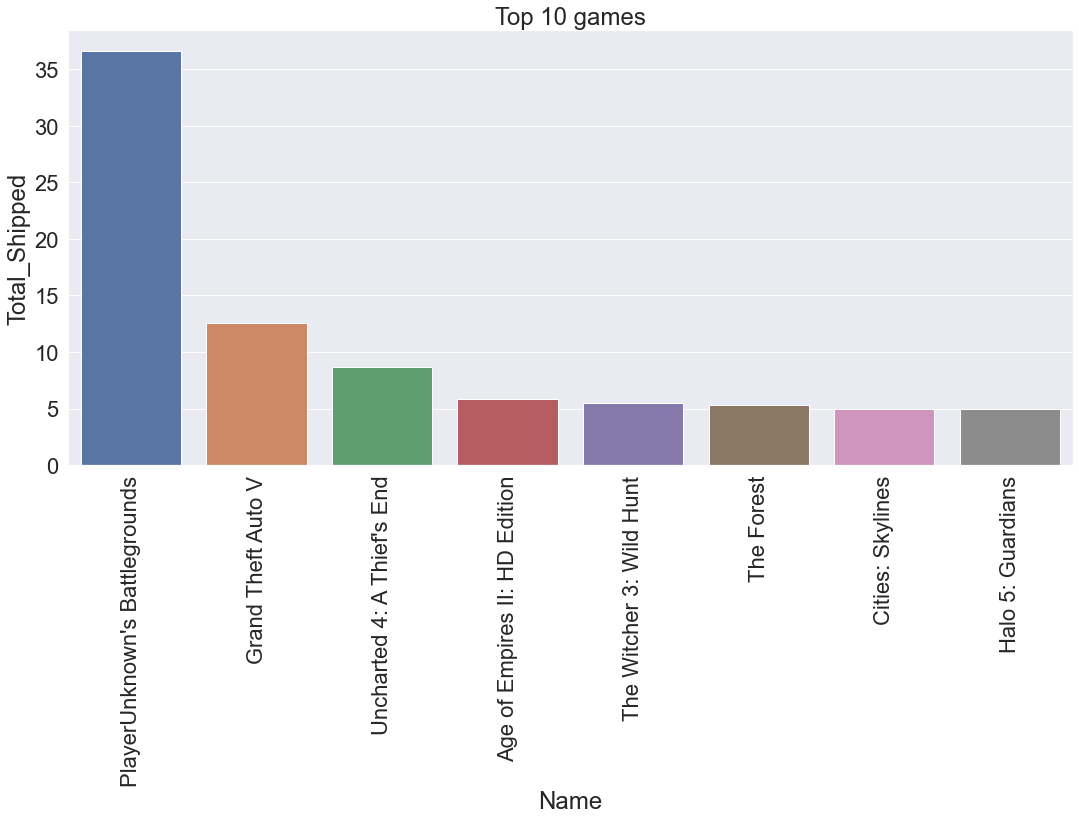

In [36]:
plt.figure(figsize=(18,8))
sns.barplot(x="Name", y="Total_Shipped", data=genres_int.head(20)).set_title('Top 10 games')
plt.xticks(rotation=90)

plt.show()

# 6. Super bonus: Which pair of genres is the most popular?

In [39]:
from collections import Counter
from itertools import combinations

In [43]:
''''''
we use this function to create columns for each game title if this title have the genre the column will get the number one
otherwise will get the number 0

def convert_nums(x, genre):
    if x is np.nan:
        return np.nan
    elif x == 1:
        return genre
    else:
        return np.nan

In [44]:
for genre in genres.values():
    sales_merge_pl_int[genre] = list(map(lambda x: convert_nums(x, genre), sales_merge_pl_int[genre]))

C:\Users\stama\AppData\Local\Temp/ipykernel_21100/826779676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_merge_pl_int[genre] = list(map(lambda x: convert_nums(x, genre), sales_merge_pl_int[genre]))


In [45]:
sales_merge_pl_int.head()

,Rank,Name,Genre,ESRB_Rating,Publisher,Developer,VGChartz_Score,Critic_Score,Total_Shipped,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,status,Vgchartzscore,img_url,serial_x,Platform_x,url_x,name_lower,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score,PlayStation 4,Xbox One,PC,Point-and-click,Fighting,Shooter,Music,Puzzle,Racing,Real Time Strategy (RTS),Role-playing (RPG),Simulator,Sport,Strategy,Turn-based strategy (TBS),Tactical,Quiz/Trivia,Hack and slash/Beat 'em up,Pinball,Adventure,Arcade,Visual Novel,Indie,Card & Board Game,MOBA,serial_y,Platform_y,url_y
0,4.0,PlayerUnknown's Battlegrounds,Shooter,NaN,PUBG Corporation,PUBG Corporation,NaN,NaN,36.6,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,1.0,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg,3458498030,PC,http://www.vgchartz.com/game/215988/playerunkn...,playerunknown'sbattlegrounds,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",0.755775,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.0625,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,NaN,NaN,Shooter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adventure,NaN,NaN,Indie,NaN,NaN,3.458498e+09,NaN,https://www.igdb.com/games/playerunknowns-batt...
1,4.0,PlayerUnknown's Battlegrounds,Shooter,NaN,PUBG Corporation,PUBG Corporation,NaN,NaN,36.6,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,1.0,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg,3458498030,PC,http://www.vgchartz.com/game/215988/playerunkn...,playerunknown'sbattlegrounds,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",0.755775,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.0625,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,NaN,NaN,Shooter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adventure,NaN,NaN,Indie,NaN,NaN,4.837463e+09,NaN,https://www.igdb.com/games/playerunknowns-batt...
2,4.0,PlayerUnknown's Battlegrounds,Shooter,NaN,PUBG Corporation,PUBG Corporation,NaN,NaN,36.6,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,1.0,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg,3458498030,PC,http://www.vgchartz.com/game/215988/playerunkn...,playerunknown'sbattlegrounds,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",0.755775,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.0625,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,NaN,NaN,Shooter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adventure,NaN,NaN,Indie,NaN,NaN,4.275517e+09,NaN,https://www.igdb.com/games/playerunknowns-batt...
3,906.0,PlayerUnknown's Battlegrounds,Shooter,T,Microsoft Studios,PUBG Corporation,NaN,NaN,NaN,1.29,0.69,NaN,0.2,2017.0,16th Jan 18,1.0,NaN,/games/boxart/full_8126502AmericaFrontccc.jpg,4837463162,XOne,http://www.vgchartz.com/game/215989/playerunkn...,playerunknown'sbattlegrounds,27789.0,PLAYERUNKNOWN'SBATTLEGROUNDS,"['PC', 'PlayStation 4', 'Xbox One']",2017-12-20,Main Game,"['Shooter', 'Adventure', 'Indie']","1,21,38","['First person', 'Third person']",0.755775,237.0,"1905,3277,7360,10239,11544,16287,17379,19561,3...",75.319996,258.0,75.0625,21.0,2017.0,12.0,17911.865696,7.072172,1.0,1.0,1.0,NaN,NaN,Shooter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adventure,NaN,NaN,Indie,NaN,NaN,3.458498e+09,NaN,https://www.igdb.com/games/playerunknowns-batt...
4,906.0,PlayerUnknown's Battlegrounds,Shooter,T,Microsoft Studios,PUBG Corporation,NaN,NaN,NaN,1.29,0.69,NaN,0.2,2017.0,16th Jan 18,1.0,NaN,/games/boxart/full_8126502AmericaFr

In [46]:
df_new = sales_merge_pl_int[genres.values()].reset_index().copy()
df_new = df_new.drop('index', 1)
df_new = df_new.fillna("")
df_new.head()

C:\Users\stama\AppData\Local\Temp/ipykernel_21100/343485320.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_new = df_new.drop('index', 1)


,Point-and-click,Fighting,Shooter,Music,Platform_y,Puzzle,Racing,Real Time Strategy (RTS),Role-playing (RPG),Simulator,Sport,Strategy,Turn-based strategy (TBS),Tactical,Quiz/Trivia,Hack and slash/Beat 'em up,Pinball,Adventure,Arcade,Visual Novel,Indie,Card & Board Game,MOBA
0,,,Shooter,,,,,,,,,,,,,,,Adventure,,,Indie,,
1,,,Shooter,,,,,,,,,,,,,,,Adventure,,,Indie,,
2,,,Shooter,,,,,,,,,,,,,,,Adventure,,,Indie,,
3,,,Shooter,,,,,,,,,,,,,,,Adventure,,,Indie,,
4,,,Shooter,,,,,,,,,,,,,,,Adventure,,,Indie,,


In [47]:
n = 200
L = Counter([y for x in df_new.values for y in combinations([z for z in x if z != ''], 2)]).most_common(n)

df = pd.DataFrame(L, columns=['Pair', 'Qty'])
df.head(20)

,Pair,Qty
0,"(Adventure, Indie)",1614
1,"(Role-playing (RPG), Adventure)",1158
2,"(Platform_y, Adventure)",840
3,"(Puzzle, Adventure)",815
4,"(Platform_y, Indie)",798
5,"(Role-playing (RPG), Indie)",724
6,"(Puzzle, Indie)",656
7,"(Strategy, Indie)",644
8,"(Shooter, Adventure)",639
9,"(Simulator, Sport)",453
